In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
df=pd.read_csv('/content/Socialmedia vs Productivity.csv')

In [6]:
print(df.head())

   age  gender    job_type  socialmedia_time social_platform  notifications  \
0   56    Male  Unemployed          4.180940        Facebook             61   
1   46    Male      Health          3.249603         Twitter             59   
2   32    Male     Finance               NaN         Twitter             57   
3   60  Female  Unemployed               NaN        Facebook             59   
4   25    Male          IT               NaN        Telegram             66   

   work_hours_day  productivity_score  actual_productivityscore  stress_level  \
0        6.753558            8.040464                  7.291555           4.0   
1        9.169296            5.063368                  5.165093           7.0   
2        7.910952            3.861762                  3.474053           4.0   
3        6.355027            2.916331                  1.774869           6.0   
4        6.214096            8.868753                       NaN           7.0   

   sleep_hours  screentime_before_slee

In [7]:
df.tail()

,age,gender,job_type,socialmedia_time,social_platform,notifications,work_hours_day,productivity_score,actual_productivityscore,stress_level,sleep_hours,screentime_before_sleep,breaks,uses_focus_apps,digital_enabled,coffee_consumption,days_feeling_burnout,weekly_offline_hours,job_satisfaction
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,NaN
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711
29999,44,Male,Unemployed,NaN,Twitter,70,8.069883,6.311227,5.402726,3.0,6.765248,0.993090,5,False,True,1,4,6.324954,7.388790


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       30000 non-null  int64  
 1   gender                    30000 non-null  object 
 2   job_type                  30000 non-null  object 
 3   socialmedia_time          27235 non-null  float64
 4   social_platform           30000 non-null  object 
 5   notifications             30000 non-null  int64  
 6   work_hours_day            30000 non-null  float64
 7   productivity_score        28386 non-null  float64
 8   actual_productivityscore  27635 non-null  float64
 9   stress_level              28096 non-null  float64
 10  sleep_hours               27402 non-null  float64
 11  screentime_before_sleep   27789 non-null  float64
 12  breaks                    30000 non-null  int64  
 13  uses_focus_apps           30000 non-null  bool   
 14  digita

In [9]:
df.describe()

,age,socialmedia_time,notifications,work_hours_day,productivity_score,actual_productivityscore,stress_level,sleep_hours,screentime_before_sleep,breaks,coffee_consumption,days_feeling_burnout,weekly_offline_hours,job_satisfaction
count,30000.000000,27235.000000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000.000000,30000.000000,30000.000000,27270.000000
mean,41.486867,3.113418,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901
std,13.835221,2.074813,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,1.410047,9.252956,7.280415,2.121194
min,18.000000,0.000000,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.639566,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,1.000000,8.000000,4.541872,3.363580
50%,41.000000,3.025913,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,2.000000,16.000000,10.013677,4.951049
75%,53.000000,4.368917,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,3.000000,24.000000,15.300809,6.581323
max,65.000000,17.973256,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000


In [10]:
df.shape

(30000, 19)

In [11]:
df.columns

Index(['age', 'gender', 'job_type', 'socialmedia_time', 'social_platform',
       'notifications', 'work_hours_day', 'productivity_score',
       'actual_productivityscore', 'stress_level', 'sleep_hours',
       'screentime_before_sleep', 'breaks', 'uses_focus_apps',
       'digital_enabled', 'coffee_consumption', 'days_feeling_burnout',
       'weekly_offline_hours', 'job_satisfaction'],
      dtype='object')

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.isnull().sum()

,0
age,0
gender,0
job_type,0
socialmedia_time,2765
social_platform,0
notifications,0
work_hours_day,0
productivity_score,1614
actual_productivityscore,2365
stress_level,1904


In [14]:
df.nunique()

,0
age,48
gender,3
job_type,6
socialmedia_time,25375
social_platform,5
notifications,61
work_hours_day,29821
productivity_score,28386
actual_productivityscore,27635
stress_level,10


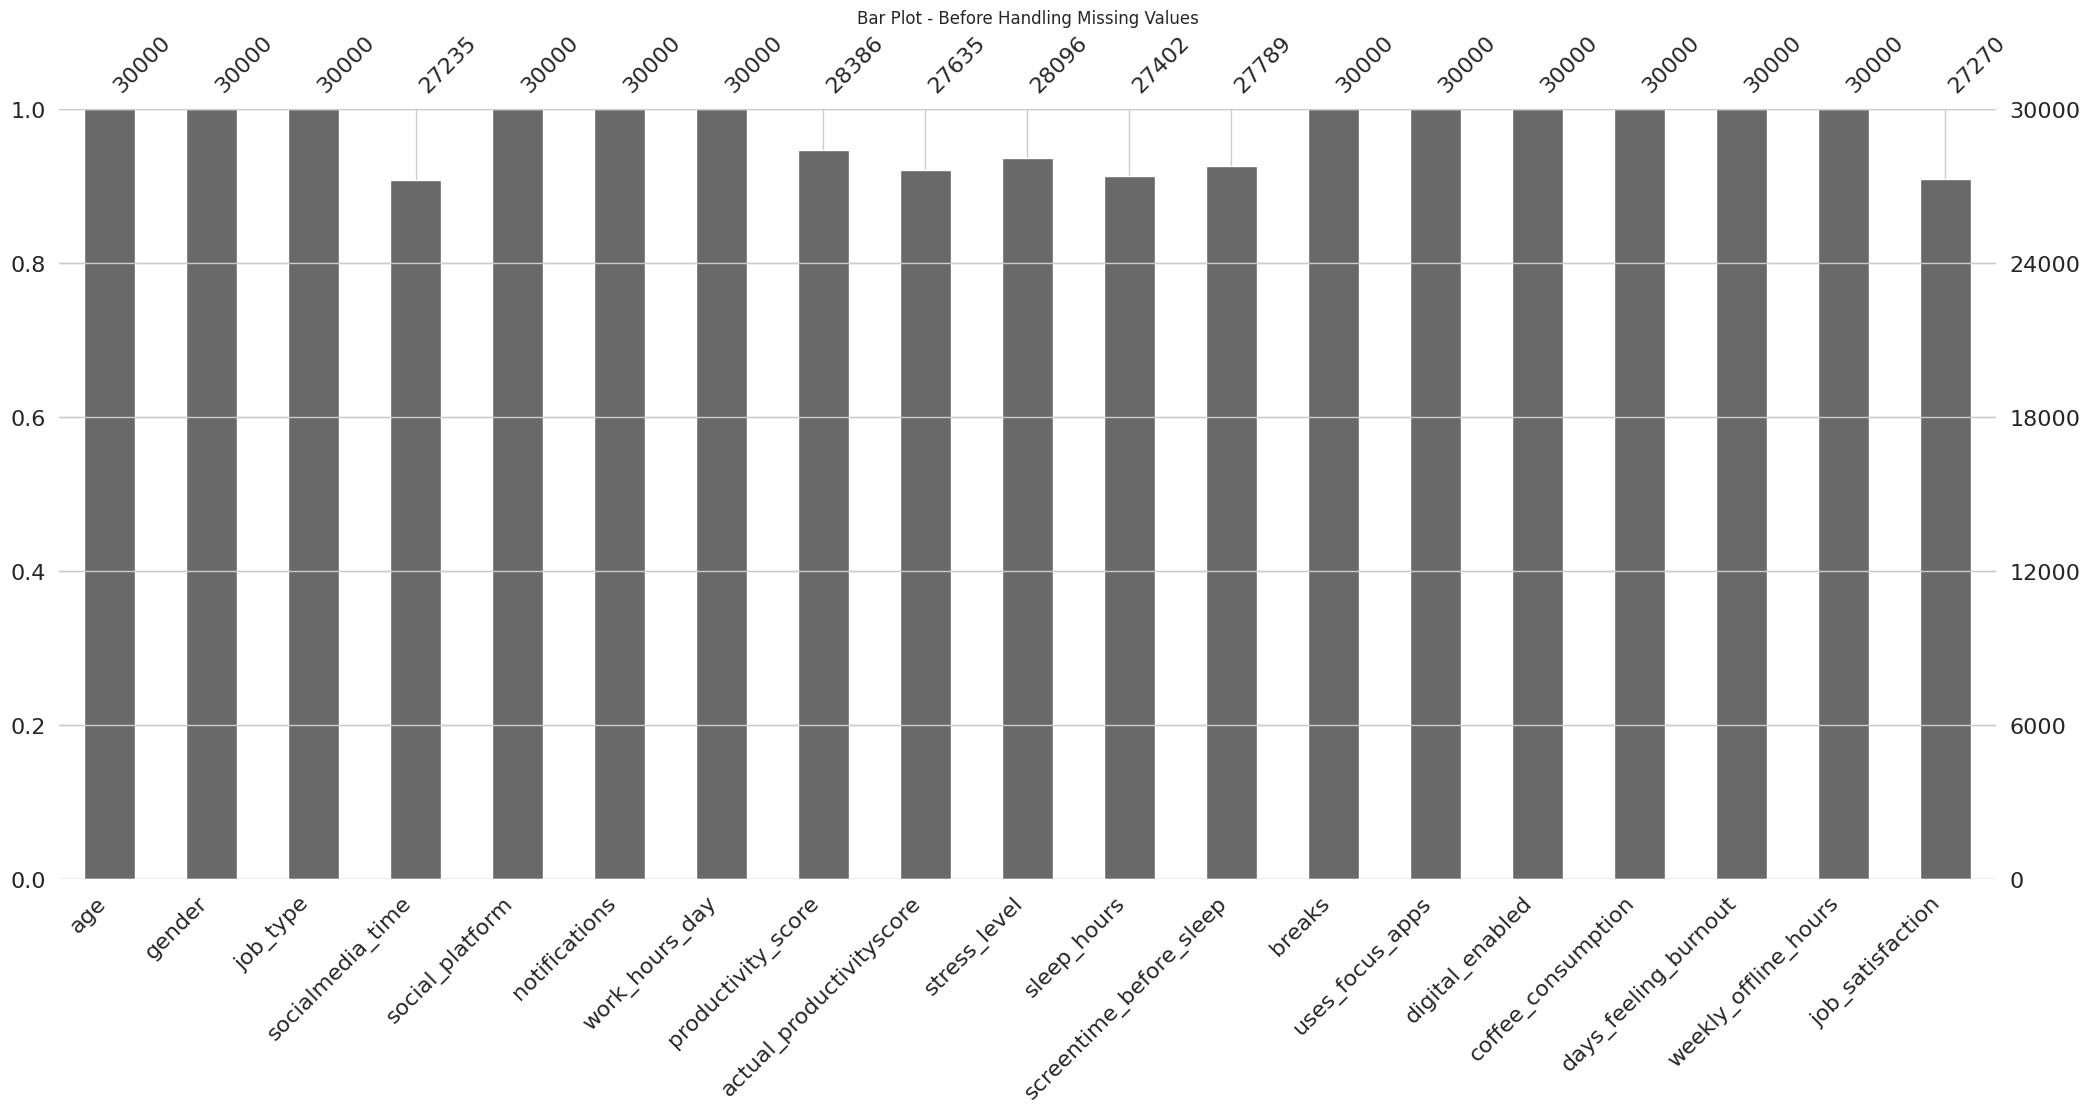

In [15]:
# Missing value bar plot
msno.bar(df)
plt.title('Bar Plot - Before Handling Missing Values')
plt.show()


In [16]:
#fill missing values
df.fillna(df.mean(numeric_only=True), inplace=True)


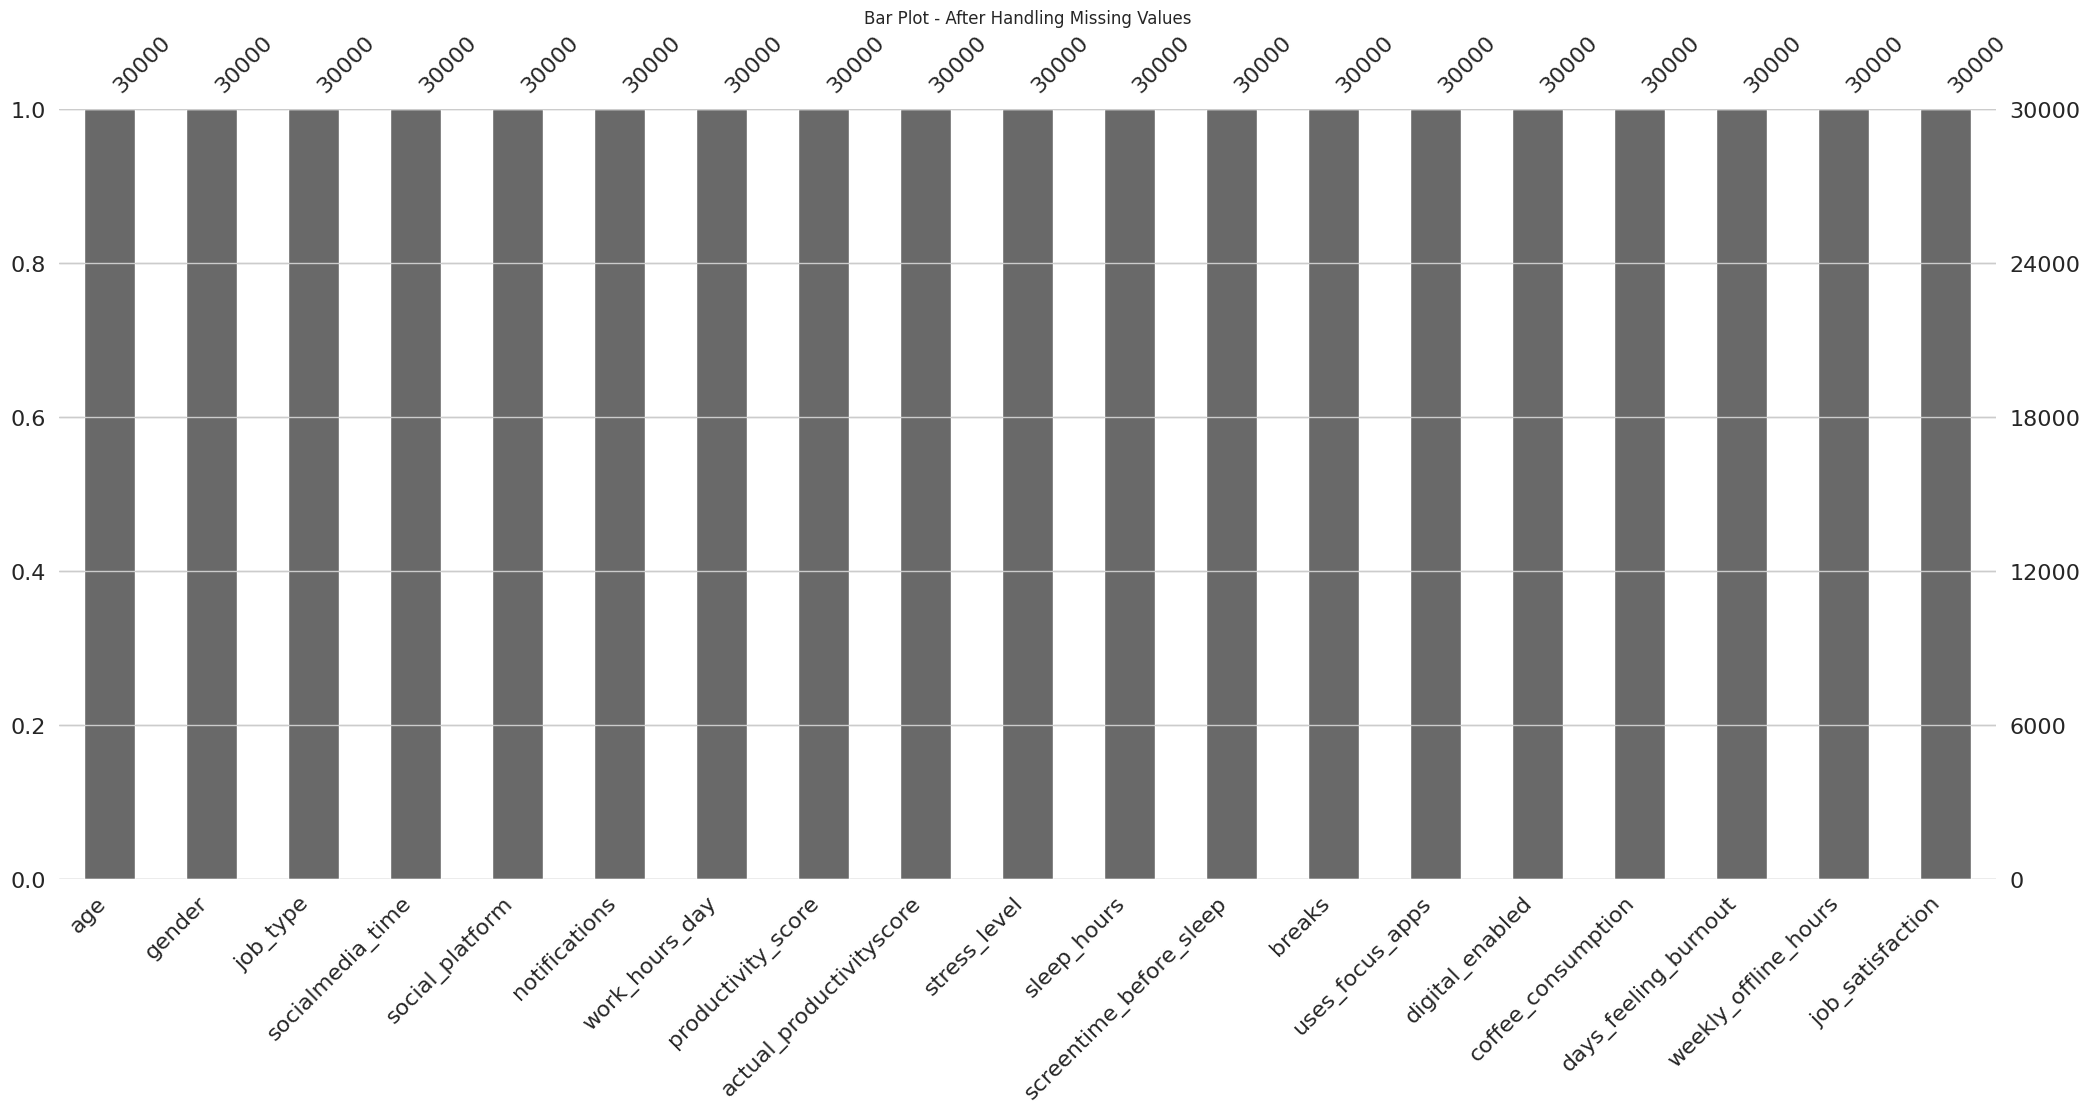

In [17]:
#After filling missing value bat plot
msno.bar(df)
plt.title('Bar Plot - After Handling Missing Values')
plt.show()


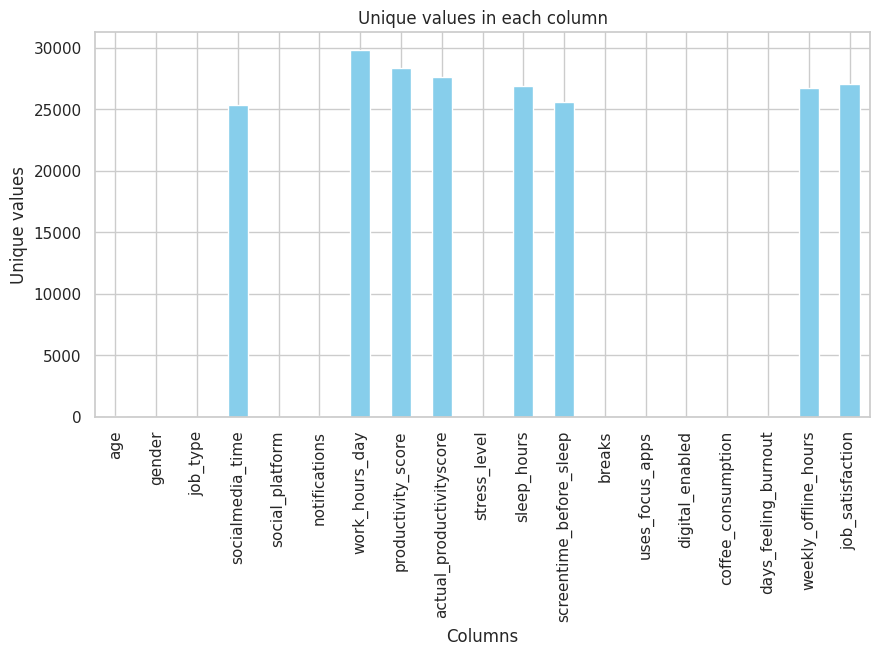

In [18]:
df.nunique().plot(kind="bar",figsize= (10,5),color="skyblue")
plt.xlabel("Columns")
plt.ylabel("Unique values")
plt.title("Unique values in each column")
plt.show()


In [19]:
df.drop_duplicates(inplace=True)
print(df.shape)

(30000, 19)


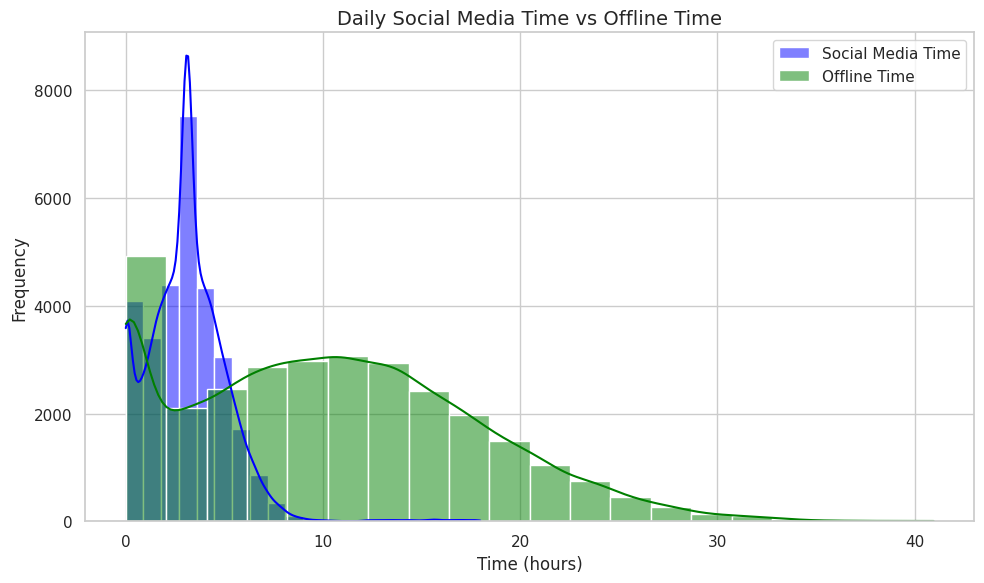

In [20]:
# Set plot style
sns.set(style="whitegrid")

# Example column names: adjust if needed
plt.figure(figsize=(10, 6))

# Plot histograms for both columns
sns.histplot(df['socialmedia_time'], color='blue', kde=True, label='Social Media Time', bins=20)
sns.histplot(df['weekly_offline_hours'], color='green', kde=True, label='Offline Time', bins=20)

# Add titles and labels
plt.title("Daily Social Media Time vs Offline Time", fontsize=14)
plt.xlabel("Time (hours)")
plt.ylabel("Frequency")
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


<ipython-input-21-9be107fb301f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='gender', y='actual_productivityscore', data=df, estimator='mean', ci='sd', palette='Set2')
<ipython-input-21-9be107fb301f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='actual_productivityscore', data=df, estimator='mean', ci='sd', palette='Set2')


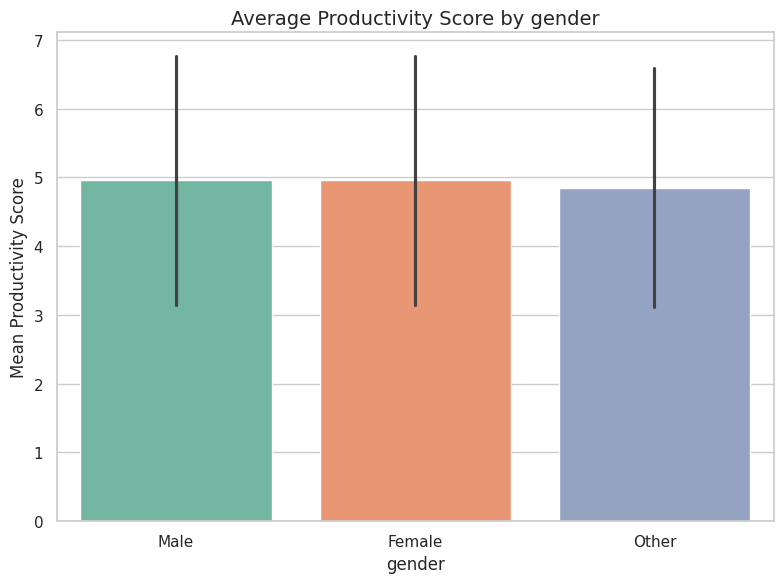

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='actual_productivityscore', data=df, estimator='mean', ci='sd', palette='Set2')

plt.title('Average Productivity Score by gender', fontsize=14)
plt.xlabel('gender')
plt.ylabel('Mean Productivity Score')
plt.tight_layout()
plt.show()


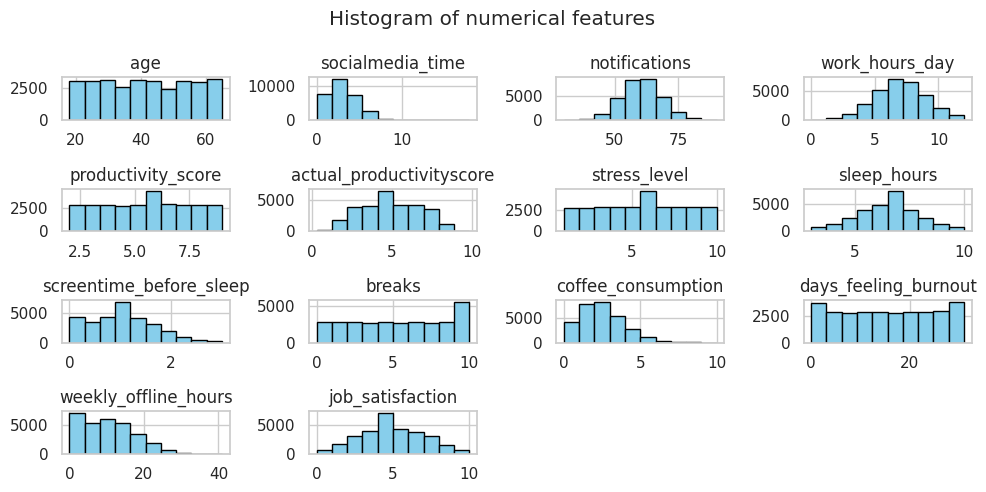

In [22]:
df.hist(figsize=(10,5),bins=10,color="skyblue",edgecolor='black')
plt.suptitle("Histogram of numerical features")
plt.tight_layout()
plt.show()

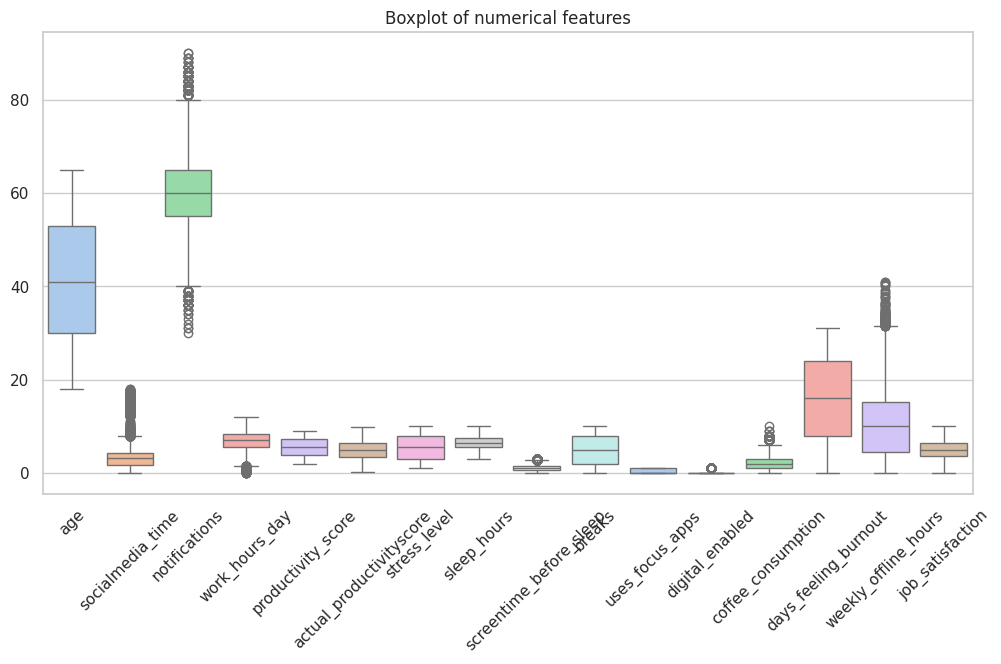

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,palette="pastel",orient="v")
plt.title("Boxplot of numerical features")
plt.xticks(rotation=45)
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])
df['job_type']=le.fit_transform(df['job_type'])
df['social_platform']=le.fit_transform(df['social_platform'])
df['uses_focus_apps']=le.fit_transform(df['uses_focus_apps'])
df['digital_enabled']=le.fit_transform(df['digital_enabled'])

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
numerical_cols=['age','socialmedia_time','notifications','work_hours_day','productivity_score','actual_productivityscore','stress_level','sleep_hours','screentime_before_sleep','breaks','coffee_consumption','days_feeling_burnout','weekly_offline_hours','job_satisfaction']
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])
print(df.head())

        age  gender  job_type  socialmedia_time  social_platform  \
0  0.808511    Male         5          0.232620                0   
1  0.595745    Male         2          0.180802                4   
2  0.297872    Male         1          0.173225                4   
3  0.893617  Female         5          0.173225                0   
4  0.148936    Male         3          0.173225                2   

   notifications  work_hours_day  productivity_score  \
0       0.516667        0.562797            0.862995   
1       0.483333        0.764108            0.437643   
2       0.450000        0.659246            0.265963   
3       0.483333        0.529586            0.130885   
4       0.600000        0.517841            0.981337   

   actual_productivityscore  stress_level  sleep_hours  \
0                  0.732476      0.333333     0.302364   
1                  0.509797      0.666667     0.300557   
2                  0.332715      0.333333     0.797603   
3                  0.1

In [26]:
# Define target
y = df['actual_productivityscore']

# Define features (drop target)
X = df.drop('actual_productivityscore', axis=1)

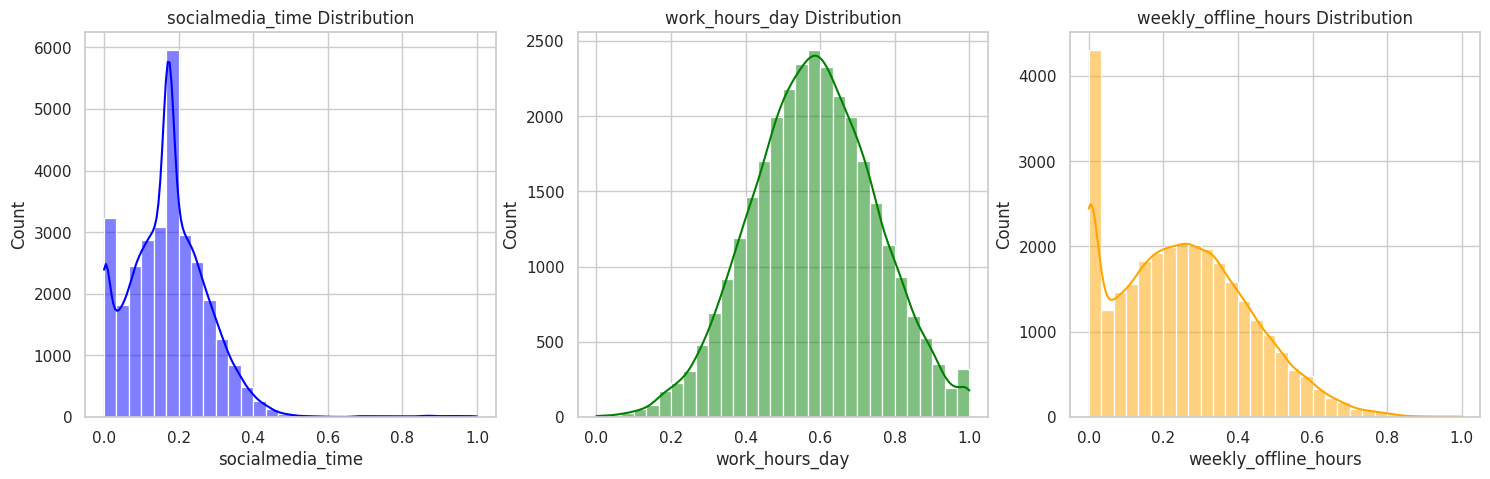

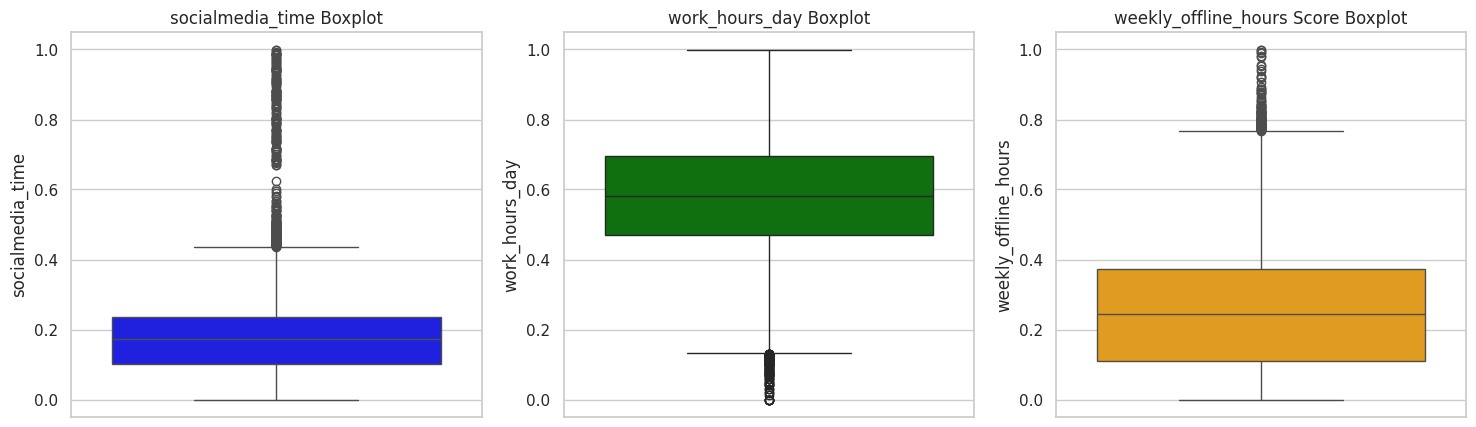

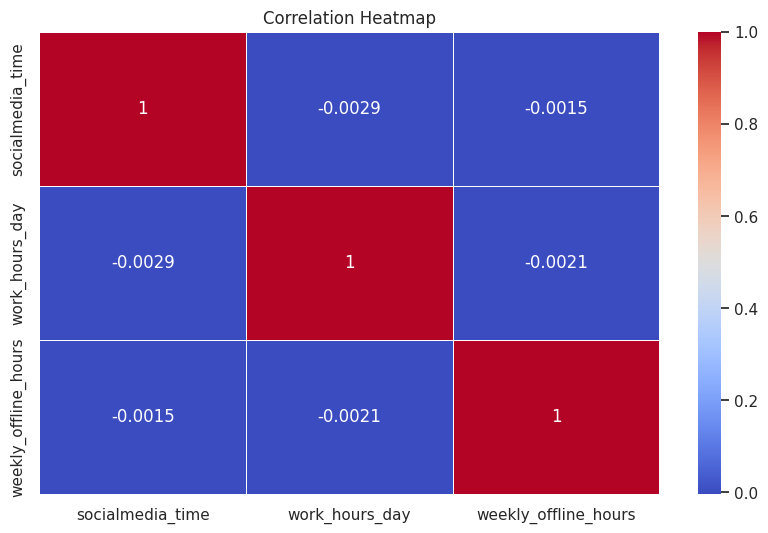

In [30]:
import seaborn as sns
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["socialmedia_time"], kde=True, ax=axes[0], bins=30, color='blue')
axes[0].set_title("socialmedia_time Distribution")

sns.histplot(df["work_hours_day"], kde=True, ax=axes[1], bins=30, color='green')
axes[1].set_title("work_hours_day Distribution")

sns.histplot(df["weekly_offline_hours"], kde=True, ax=axes[2], bins=30, color='orange')
axes[2].set_title("weekly_offline_hours Distribution")

plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df["socialmedia_time"], ax=axes[0], color='blue')
axes[0].set_title("socialmedia_time Boxplot")

sns.boxplot(y=df["work_hours_day"], ax=axes[1], color='green')
axes[1].set_title("work_hours_day Boxplot")

sns.boxplot(y=df["weekly_offline_hours"], ax=axes[2], color='orange')
axes[2].set_title("weekly_offline_hours Score Boxplot")

plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df[["socialmedia_time", "work_hours_day", "weekly_offline_hours",]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#fig, axes = plt.subplots(1, 3, figsize=(18, 5))
#sns.violinplot(x=df["actual_productivityscore"], y=df["socialmedia_time"], ax=axes[0])
#axes[0].set_title("socialmedia_time vs actual_productivityscore")

#sns.violinplot(x=df["actual_productivityscore"], y=df["work_hours_day"], ax=axes[1])
#axes[1].set_title("work_hours_day vs actual_productivityscore")

#sns.violinplot(x=df["actual_productivityscore"], y=df["weekly_offline_hours"], ax=axes[2])
#axes[2].set_title("weekly_offline_hours vs actual_productivityscore")

#plt.xticks(rotation=45)
#plt.show()

In [38]:
print(X_train.select_dtypes(include='object').columns)


Index(['gender'], dtype='object')


In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # 'Male', 'Female' → 1, 0


In [40]:
y = df['actual_productivityscore']
X = df.drop('actual_productivityscore', axis=1)

In [42]:
print(X.dtypes)

age                        float64
gender                       int64
job_type                     int64
socialmedia_time           float64
social_platform              int64
notifications              float64
work_hours_day             float64
productivity_score         float64
stress_level               float64
sleep_hours                float64
screentime_before_sleep    float64
breaks                     float64
uses_focus_apps              int64
digital_enabled              int64
coffee_consumption         float64
days_feeling_burnout       float64
weekly_offline_hours       float64
job_satisfaction           float64
gender_encoded               int64
dtype: object


In [44]:
!pip install -U scikit-learn

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
import numpy as np
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.05355468296952041
MSE: 0.0059234631786186185
RMSE: 0.07696403821668026
R² Score: 0.8332944485580763


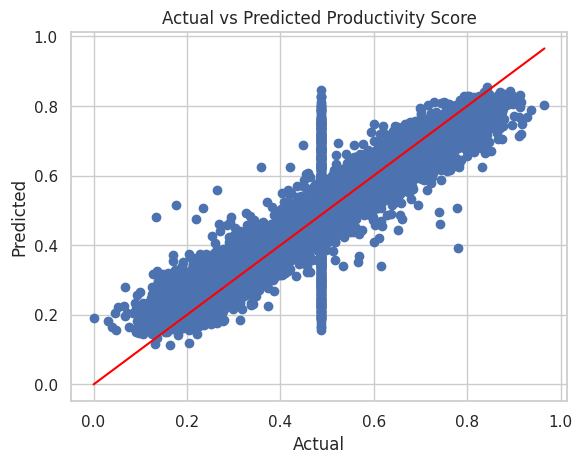

In [48]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Productivity Score")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

MAE: 0.05326330959311507
MSE: 0.005509690065066703
RMSE: 0.07422728652636242
R² Score: 0.8449393719730641


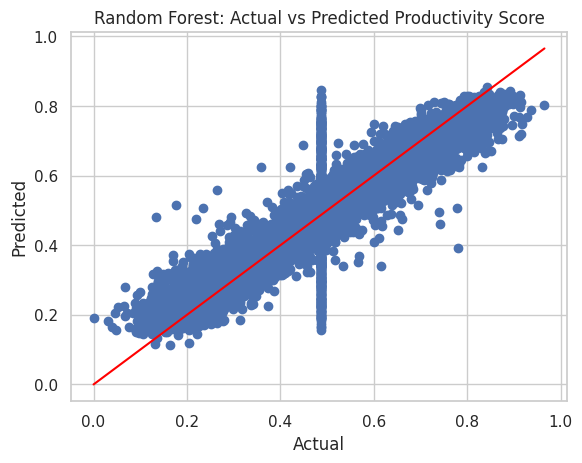

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already prepared (with categorical variables encoded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Plot Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs Predicted Productivity Score")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

MAE: 0.051763394405637715
MSE: 0.005323315422142765
RMSE: 0.0729610541463236
R² Score: 0.8501845616005739


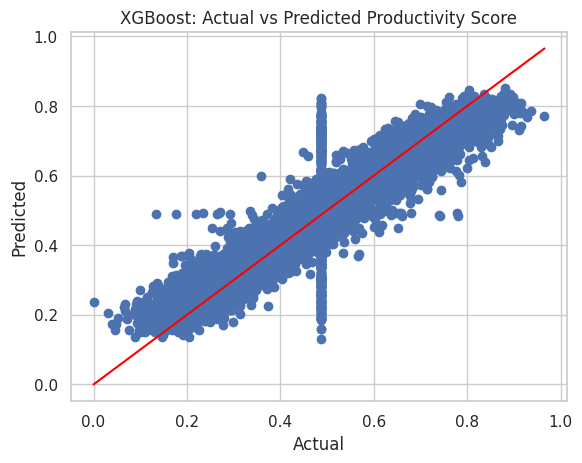

In [49]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Plot Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost: Actual vs Predicted Productivity Score")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

In [52]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split the data (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter space
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,            # Number of random combinations to try
    cv=3,                 # 5-fold cross-validation
    scoring='r2',         # Can also try 'neg_mean_squared_error'
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Run search
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best model
best_model = random_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
MAE: 0.05193651864590358
MSE: 0.005357185340434524
RMSE: 0.07319279568669668
R² Score: 0.8492313517576392


In [55]:
import joblib
joblib.dump(xgb_model,"socialmedia vs productivity.pkl")

['socialmedia vs productivity.pkl']